# Week 2

The goal is to explore a numerical variable and its interaction with multiple variables, both numerical and categorical.

### Dataset

- For this assignment, we are going to explore data from activity trackers. Activity trackers are applications that track your activity using your smartphone, a smartwatch, wrist band or a clip-on device. Popular applications include Steps (iPhone), Apple Watch, Fitbit and Jawbone. For a study in France, over 900 volunteers received a Fitbit Zip (a clip-on activity tracker) and recorded their daily steps, distance and calories.


- The data were simulated from the actual data to conform to the GDPR law. So these are not the real data, but the distributions of the variables and the relations between them are very similar.

### To do:

- our data pre-processing steps


- Create the variable mean steps per participant.


- The head() of the resulting data frame


- The relation of mean_steps per participant with at least 2 other numerical variables (e.g., how are steps related to weight, height).
  - Scatter plot matrix including all 3 variables
  - Scatter plots of your variable with the 2 other variables (2 scatter plots in total)
  - Pearson’s correlation for the 2 relations
  - Verbal description of the relations, including strength of the association, linearity, etc.


- The relation of mean steps per participant with a categorical variable with two levels (e.g. gender, weekday vs weekend)

  - Graphs of the relation (e.g. histogram, violin plot, bar plot)
  - Verbal description of the relation
  
  
- The relation between two categorical variables
  - Graphs of the relation (e.g., bar plot)
  - Cross table with relevant percentages
  - Verbal description of the relation
    
    

In [1]:
# importing relevant libraries. 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing Data and some Transformation

In [2]:
# load the first dataframe.
survey_data = pd.read_csv('survey.csv')

# Load the second dataframe (with the proper speratior).
step_data = pd.read_csv("steps.csv", sep=";")

In [3]:
# merge the two dataframes in their common row 'id', and show the head of the dataframe
# in this case, both dataframes contain the same amount of rows so no extra actions are needed!

df = survey_data.merge(step_data, on = "id")
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#let's calculate the mean steps per participant. 
#For this, we can use the Pandas built-in method .mean() for Dataframes.
mean_steps = df.loc[:,"20-6-2013":"13-5-2014"].mean(axis=1) #axis=1 calculates mean over columns

In [5]:
#Show us the head of the resulting datraframe.
mean_steps.head

<bound method NDFrame.head of 0      10205.521212
1       5687.423313
2       8301.729730
3       3633.200000
4       5312.129630
           ...     
924     6282.131868
925     4799.880000
926    10030.326829
927    15679.679012
928     7584.467153
Length: 929, dtype: float64>

## Relation between numerical variables

We'll investigate the relation between these numerical variables: height, weight and mean_steps. Before procceeding to the scatter plot, lets apply more transformastions so we have the optimized dataset we need.

In [6]:
df.shape

(929, 337)

In [7]:
mean_steps.shape

(929,)

### Choosing "Features"

In [8]:
# Creating a new dataframe including only the variables we gonna focus on.
df_features = ['id', 'height', 'weight']

In [9]:
# Creating a new variable for this dataset.
X = df[df_features]
X.head()

,id,height,weight
0,1,178.0,98.0
1,2,180.0,77.0
2,3,180.0,83.0
3,4,178.0,80.0
4,5,167.0,61.0


In [10]:
# Combining our dataset X with time series mean_steps.
# in this case, both dataframes contain the same amount of rows so no extra actions are needed.

#pd.concat([X, mean_steps], axis=1) #axis = 1 --> dataframes merged with columns next to each other.

In [11]:
X.shape

(929, 3)

Our Data is clean and ready to analyzed.Let's start with a scatter plot matrix!

<AxesSubplot:xlabel='height'>

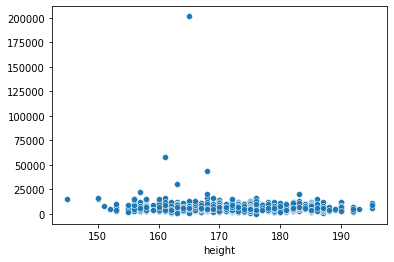

In [12]:
# height and mean steps correlation.
sns.scatterplot(x=X['height'], y=mean_steps)

<AxesSubplot:xlabel='weight'>

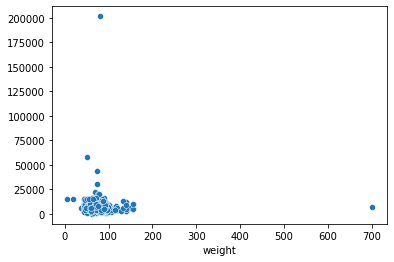

In [13]:
# weight and mean steps correlation.
sns.scatterplot(x=X['weight'], y=mean_steps)

### Cleaning the data

We can see from the scatter plot that we first need to clean up the file. There are some anomalies here (implausible values).
First, lets have a look at the missing values through a histogram.

D:\xrist\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\xrist\anaconda\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


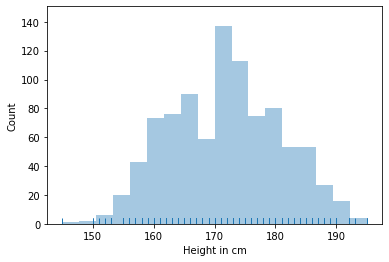

D:\xrist\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\xrist\anaconda\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


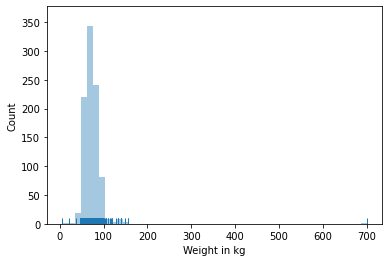

In [14]:
sns.distplot(X["height"], rug=True, kde=False) #the rug=True allows us to see individual values
plt.xlabel("Height in cm")
plt.ylabel("Count")
plt.show()

sns.distplot(X["weight"], rug=True, kde=False) 
plt.xlabel("Weight in kg")
plt.ylabel("Count")
plt.show()

D:\xrist\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\xrist\anaconda\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


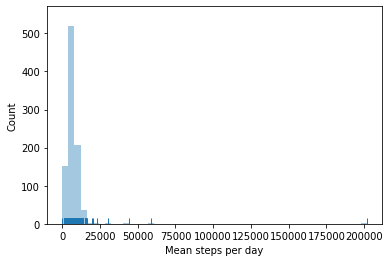

In [15]:
# mean steps could also have an anomalie.

sns.distplot(mean_steps, rug=True, kde=False) 
plt.xlabel("Mean steps per day")
plt.ylabel("Count")
plt.show()

### Our findings:

Height: there is one value(close to 0) that seem improbable. Otherwise, it seems fine.


Weight: there are 2 impossibly low and 1 impossibly high values.


Mean steps: there is one extreme high value. The other high values are close enough to each other to seem plausible, though this is debatable.

In [16]:
#Removing our 'wrong' values.

X["height"].mask(X["height"].between(0, 140), inplace=True) #.mask() replaces values with NaN. .between() selects the values
X["weight"].mask(X["weight"].between(0, 35), inplace=True)
X["weight"].mask(X["weight"].between(200, 1000), inplace=True)

D:\xrist\anaconda\lib\site-packages\pandas\core\generic.py:9002: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cond, other, inplace, axis, level, errors=errors, try_cast=try_cast
D:\xrist\anaconda\lib\site-packages\pandas\core\generic.py:9002: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cond, other, inplace, axis, level, errors=errors, try_cast=try_cast
D:\xrist\anaconda\lib\site-packages\pandas\core\generic.py:9002: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [17]:
# do the same for our mean_steps.
result = mean_steps.mask(mean_steps > 50000) #mask out values greater than 50000.

Let's try again with a scatterplot matrix..

Text(0, 0.5, 'Mean steps per day')

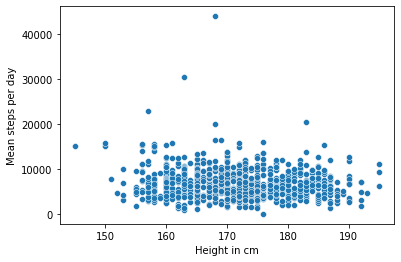

In [18]:
sns.scatterplot(x=X['height'], y=result)
plt.xlabel('Height in cm') 
plt.ylabel('Mean steps per day')

Text(0, 0.5, 'Mean steps per day')

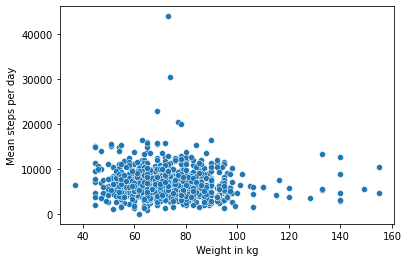

In [19]:
sns.scatterplot(x=X['weight'], y=result)
plt.xlabel('Weight in kg') 
plt.ylabel('Mean steps per day')

Text(0, 0.5, 'Mean steps per day')

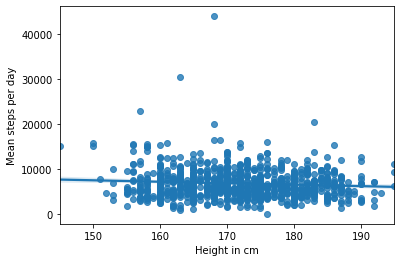

In [20]:
# on the same scatterplots, lets add the reggression line.
sns.regplot(x=X['height'], y=result)
plt.xlabel('Height in cm') 
plt.ylabel('Mean steps per day')

Text(0, 0.5, 'Mean steps per day')

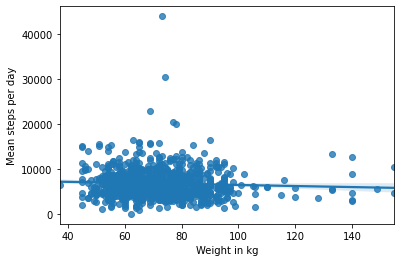

In [21]:
sns.regplot(x=X['weight'], y=result)
plt.xlabel('Weight in kg') 
plt.ylabel('Mean steps per day')

### Conclusion:
    
- Both relations are linear. The points are around a straight line, with no clear curvature.


- There is a slight negative correlation between height and mean steps (the regression line tends to reach axis x).


- Same with weight (the regression line tends to reach axis x).

## Relation between a categorical and numerical variable
Let's investigate the relation between gender and mean steps. We will deploy a violin plot.

D:\xrist\anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 47.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\xrist\anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 39.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Mean steps per day')

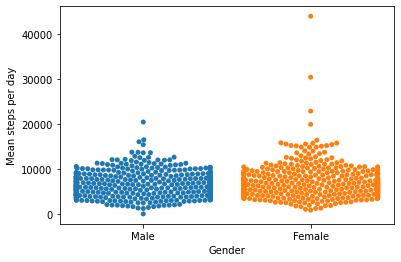

In [22]:
# Violin plot showing the relationship between two genders.
sns.swarmplot(x=df['gender'], y=result)
plt.xlabel('Gender') 
plt.ylabel('Mean steps per day')

The distributions are almost identical. The few participants with a very high number of steps seem to be female. However, this could be just a coincidence and not some kind of "real" relation...

## Relation between two categorical variables

Let's look at the relation between gender and education. We want to see how the education level differs for males and females.

In [23]:
pd.crosstab(df["education_1"], df["gender"], margins=True) #show us only the informatin we need, margins=True show us the total!

gender,Female,Male,All
education_1,,,
Bachelor,185,172,357
High school,63,43,106
Master or doctorate,159,253,412
No degree,0,1,1
Primary,7,6,13
Vocational,21,19,40
All,435,494,929


It seems the men in this sample are somewhat higher educated - they are overrepresented at the highest level ("Master or doctorate") and underrepresented at lower levels. However, it's hard to tell since there are more men overall. So let's make a proportional table.

In [24]:
pd.crosstab(df["education_1"], df["gender"], normalize="columns", margins=True) #normalize over columns

gender,Female,Male,All
education_1,,,
Bachelor,0.425287,0.348178,0.384284
High school,0.144828,0.087045,0.114101
Master or doctorate,0.365517,0.512146,0.443488
No degree,0.000000,0.002024,0.001076
Primary,0.016092,0.012146,0.013994
Vocational,0.048276,0.038462,0.043057


Indeed, men are more at the master level and less at the bachelor and high school level. The others involve numbers too small to be an important difference. This is why it's important to always make both tables, absolute and proportional.

Finally, let's make a graph of the data...

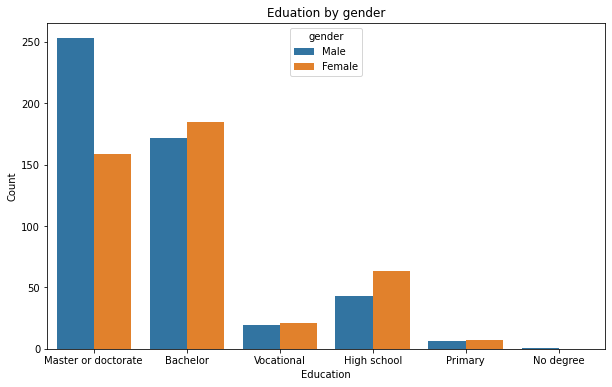

In [25]:
plt.figure(figsize=(10, 6)) #set the figure ("canvas") size
plot = sns.countplot(data = df, x = "education_1", hue = "gender") #create the plot
plt.xlabel("Education")
plt.ylabel("Count")
plt.title("Eduation by gender")
plt.show()